In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# TASK 1: REMOVING THE FIRST COLUMN

original_sample = pd.read_csv('breast-cancer-wisconsin.data', names=['aa','a','b','c','d','e','f','g','h','i','j'])
cut_sample = original_sample.iloc[:, [1,2,3,4,5,6,7,8,9,10]]
print (cut_sample)




     a   b   c  d  e   f   g   h  i  j
0    5   1   1  1  2   1   3   1  1  2
1    5   4   4  5  7  10   3   2  1  2
2    3   1   1  1  2   2   3   1  1  2
3    6   8   8  1  3   4   3   7  1  2
4    4   1   1  3  2   1   3   1  1  2
..  ..  ..  .. .. ..  ..  ..  .. .. ..
694  3   1   1  1  3   2   1   1  1  2
695  2   1   1  1  2   1   1   1  1  2
696  5  10  10  3  7   3   8  10  2  4
697  4   8   6  4  3   4  10   6  1  4
698  4   8   8  5  4   5  10   4  1  4

[699 rows x 10 columns]


In [3]:
# The researchers were trying to see whether they could use certain biological data obtained through tests, to
# achieve the goal of successfully carrying out cancer diagnosis using linear regression

# 10 meaningful columns in this dataset

# 699 rows

In [4]:
# TASK 2.1
cut_sample_copy = cut_sample
print(cut_sample_copy.replace("?", np.NaN))

# TASK 2.2
cut_sample_copy = cut_sample_copy.replace({'?':np.NaN})
print(cut_sample_copy.loc[[23]])
# Only one column (column at index 6 , which is the column representing Bare Nuclei), has missing values.
# There are 16 missing values

     a   b   c  d  e   f   g   h  i  j
0    5   1   1  1  2   1   3   1  1  2
1    5   4   4  5  7  10   3   2  1  2
2    3   1   1  1  2   2   3   1  1  2
3    6   8   8  1  3   4   3   7  1  2
4    4   1   1  3  2   1   3   1  1  2
..  ..  ..  .. .. ..  ..  ..  .. .. ..
694  3   1   1  1  3   2   1   1  1  2
695  2   1   1  1  2   1   1   1  1  2
696  5  10  10  3  7   3   8  10  2  4
697  4   8   6  4  3   4  10   6  1  4
698  4   8   8  5  4   5  10   4  1  4

[699 rows x 10 columns]
    a  b  c  d  e    f  g  h  i  j
23  8  4  5  1  2  NaN  7  3  1  4


In [5]:
# TASK 2.3
# rows before dropping 
print(len(cut_sample_copy))

temp = cut_sample_copy

temp = temp.dropna()
temp = temp.reset_index(drop=True)

# rows after dropping
print(len(temp))


cut_sample_copy = cut_sample_copy.fillna(cut_sample_copy.median())
print(cut_sample_copy.loc[[23]])


699
683
    a  b  c  d  e    f  g  h  i  j
23  8  4  5  1  2  1.0  7  3  1  4


In [6]:
# TASK 3.1
print(cut_sample_copy.dtypes)
convert_dict = {'f': int }
cut_sample_copy = cut_sample_copy.astype(convert_dict)
print(cut_sample_copy.dtypes)

a     int64
b     int64
c     int64
d     int64
e     int64
f    object
g     int64
h     int64
i     int64
j     int64
dtype: object
a    int64
b    int64
c    int64
d    int64
e    int64
f    int32
g    int64
h    int64
i    int64
j    int64
dtype: object


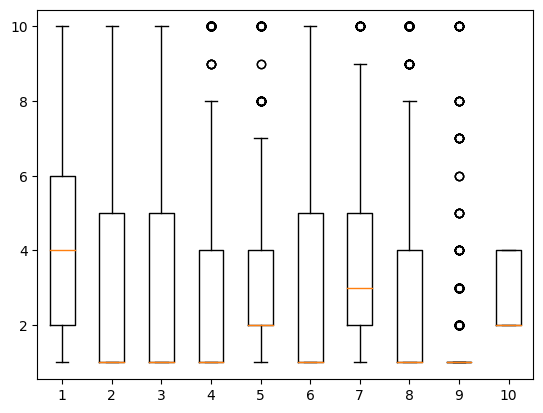

In [7]:

plt.boxplot(cut_sample_copy)

plt.show()
# 5 COLUMNS HAVE OUTLIERS


In [8]:
othertemp = cut_sample_copy
numOfColumns = len(othertemp.columns)

z = (othertemp - othertemp.mean())/othertemp.std()
print('Number of rows before discarding outliers = %d' % (z.shape[0]))

z2 = z.loc[((z > -3).sum(axis=1)== numOfColumns) & ((z <= 3).sum(axis=1)==numOfColumns),:]
print('Number of rows after discarding missing values = %d' % (z2.shape[0]))

# 699 rows before discarding outliers
# 648 rows after discarding outliers

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 648


In [9]:
# TASK 4.1
cut_sample_copy.duplicated().sum()
# 242 duplicate rows/entries
# TASK 4.2

# Number of rows before removing duplicates:
print(len(cut_sample_copy))
# 699

# Number of rows before removing duplicates:
cut_sample_copy = cut_sample_copy.drop_duplicates()
print(len(cut_sample_copy))
# 457

699
457
